# INTRODUCTION TO MULTIPLE FEATURES REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Riprendiamo la banca dati advertising

In [2]:
url = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/Advertising.csv'
advertising = pd.read_csv(url, usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Nella scorsa lezione avevamo effettuato un fitting con un predictor (TV), Riprendiamo il risultato

Text(0.5, 1.0, 'Sales vs investment in TV advertising')

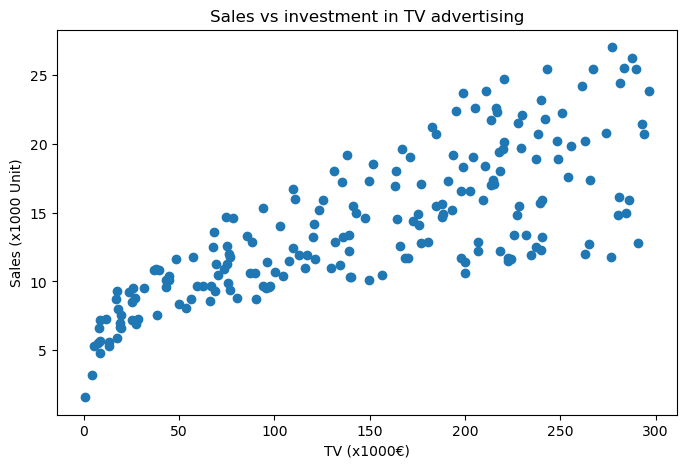

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')

In [4]:
x_train = advertising['TV'].values.reshape(-1,1)
y_train = advertising['Sales'].values.reshape(-1,1)
model = LinearRegression()
model.fit(x_train, y_train)
print('Coeff', model.coef_, ' - Intercept: ', model.intercept_)
y_predict= model.predict(x_train)

Coeff [[0.04753664]]  - Intercept:  [7.03259355]


In [5]:
aa1 = model.predict(x_train)
x_train[10]
y_train[10]
print(aa1[10],y_train[10])

[10.17476548] [8.6]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


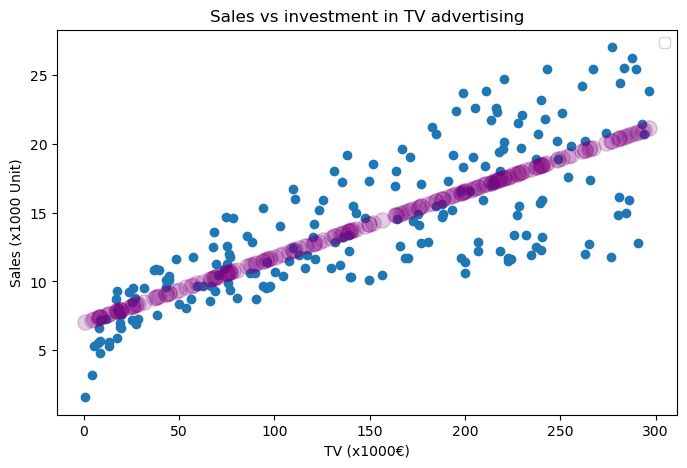

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300
plt.legend()
plt.plot(x_train, y_predict, 'o', color='purple', alpha=0.2, ms=11)

# Calcoliamo ora il MSE

In [7]:
mse_advertising = []
mse_advertising.append(mean_squared_error(y_predict, y_train))
print(mse_advertising)

[10.512652915656757]


# Proviamo ora un altro predictor: Newspaper

Text(0.5, 1.0, 'Sales vs investment in Newspaper advertising')

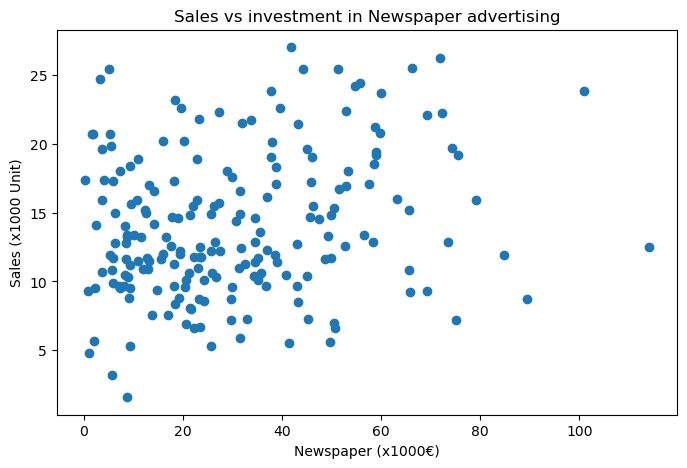

In [8]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.scatter(advertising['Newspaper'].values, advertising['Sales'].values)
plt.xlabel("Newspaper (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Newspaper advertising')

In [9]:
x_train = advertising['Newspaper'].values.reshape(-1,1)
y_train = advertising['Sales'].values.reshape(-1,1)
model = LinearRegression()
model.fit(x_train, y_train)
print('Coeff', model.coef_, ' - Intercept: ', model.intercept_)
y_predict= model.predict(x_train)

Coeff [[0.0546931]]  - Intercept:  [12.35140707]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


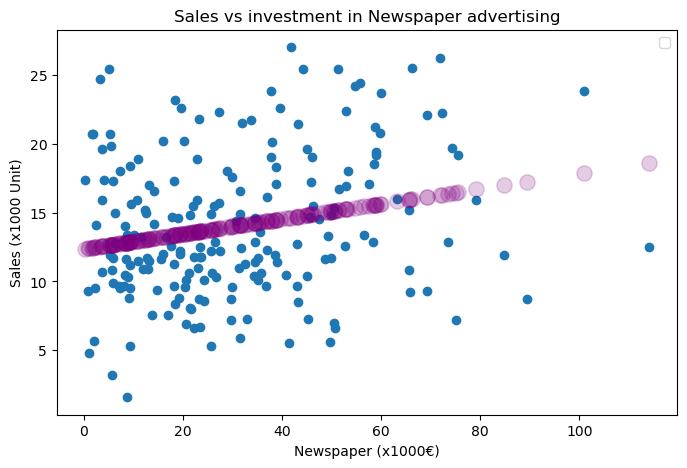

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Newspaper'].values, advertising['Sales'].values)
plt.xlabel("Newspaper (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Newspaper advertising')
# punti x 
x0 = 0; x1 = 300
plt.legend()
plt.plot(x_train, y_predict, 'o', color='purple', alpha=0.2, ms=11)

# OSSERVIAMO CHE I DATI SONO MOLTO PIU' SPARPAGLIATI INTORNO ALLA RETTA DI REGRESSIONE

# Calcoliamo MSE per Newspaper

In [11]:
mse_advertising.append(mean_squared_error(y_predict, y_train))
print(mse_advertising)

[10.512652915656757, 25.674022720559698]


## Ricordiamo che MSE è un indicatore di performance della nostra prediction. Più è basso, migliore è la nostra predizione del target. In questo caso il predictor TV è più significativo degli altri perchè ha MSE più basso. In un certo senso potremmo dire che la feature newspaper è meno relazionata alle sales. In effetti se osserviamo il grafico, per un certo investimento in newspaper, abbiamo una grande variabilità sulle vendite, quasi a lasciare intendere che non c'è relazione diretta tra gli investimenti in newspaper adv e le vendite.  Viceversa, MSE per TV adv è molto basso, e dal grafico possiamo notare che la dispersione intorno alla regression line è bassa. Quasi ad intendere che l'investimento in TV adv è molto legato alle sales. Estendendo questo discorso si potrebbe arrivare ad individuare una relazione di causa-effetto. Un investimento in TV adv causa una certo numero di unità vendute. (Però per la relazione causa effetto bisogna fare molta molta attenzione)

Riprendiamo il nostro dataset

In [12]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Prendiamo ora in considerazione DUE predictor (TV, Radio) e un target (Sales):

Ricordiamo la notazione da utilizzare con due predictora

m = numero di sample (in questo esempio 200)

n = numero di features (in questo esempio 3)

$x^{(i)}$ = input features dell’iesimo sample

$x^{(i)}_j$ = valore della feature j dell’iesimo sample

In [42]:
x_train = advertising[['TV','Radio']].values
x_train

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [ 67.8,  36.6],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206

Osserviamo che OGNI RIGA, corrisponde ad un sample.

Per ogni riga fissata ho sulle colonne i valori delle features 

In [14]:
x_train[2,:]    # stampo tutte le features del sample n. 3

array([17.2, 45.9])

In [15]:
x_train[2,1]   # stampo la features 2 del sample 3

45.9

In [43]:
x_train[:,1]  # stampo la features 2 di ogni sample

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7,  8.4,
       25.7, 22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8,
       49.4, 28.1, 19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3,
       24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 24.6, 43.7,  1.6,
       28.5, 29.9,  7.7, 26.7,  4.1, 20.3, 44.5, 43. , 18.4, 27.5, 40.6,
       25.5, 47.8,  4.9,  1.5, 33.5, 36.5, 14. , 31.6,  3.5, 21. , 42.3,
       41.7,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,  0.4, 26.9,
        8.2, 38. , 15.4, 20.6, 46.8, 35. , 14.3,  0.8, 36.9, 16. , 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. , 39.6,  2.9,
       27.2, 33.5, 38.6, 47. , 39. , 28.9, 25.9, 43.9, 17. , 35.4, 33.2,
        5.7, 14.8,  1.9,  7.3, 49. , 40.3, 25.8, 13

Possiamo vedere il set delle features come una matrice di m righe, n colonne, (m,n)

$\begin{bmatrix}
 x_{11}&  x_{12}& ..& x_{1n} \\ 
 x_{21}&  x_{22}& ..& x_{2n}  \\
 ...&  ...& ...& ... \\
 x_{m1}&  x_{m2}& ..& x_{mn}
\end{bmatrix} $

Dove sulle RIGHE abbiamo i samples, e sulle COLONNE ABBIAMO le features per ogni sample

Consideriamo ora come viene effettuata la prediction per IL PRIMO sample:
se ho un solo sample $x^1$ allora avrò:

$\hat y^1 = h(x^1) = w_0 + w_1 x^1$

Se ho un vettore di m sample 
$\begin{bmatrix}
 x^{1} \\ 
 x^{2}  \\
 ... \\
 x^{m}
\end{bmatrix} $

posso calcolare la prediction $\hat y^{(i)}$ per ogni sample utilizzando il linguaggia matriciale. Infatti

$\begin{bmatrix}
 \hat y^1 = h(x^1) = w_0 + w_1 x^1 \\ 
 \hat y^2 = h(x^2) = w_0 + w_1 x^2  \\
 ... \\
\hat y^m = h(x^m) = w_0 + w_1 x^m
\end{bmatrix} $

Questa operazione non è altro che un'operazione di VECTORIZATION sulla funzione h
infatti posso scrivere

$\vec{\hat y} = h(\vec{x})$



# Multivariate Linear Regression Model

Multivariate Linear Regression is an extension of simple linear regression to predict an outcome based on **multiple input features**.

## Model Equation

The general form of the multivariate linear regression model is:

$$
\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n 
$$

Where:
- $\hat y$ is the **predicted dependent variable** (target)
- $x_1, x_2, \ldots, x_n$ are the **independent variables** (features)
- $\beta_0$ is the **intercept**
- $\beta_1, \beta_2, \ldots, \beta_n$ are the **coefficients**

## Vectorized Form

The model can also be expressed in matrix form as:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$

Where:
- $\mathbf{y}$ is the $m \times 1$ vector of outputs
- $\mathbf{X}$ is the $m \times (n+1)$ matrix of inputs (including a column of ones for the intercept)
- $\boldsymbol{\beta}$ is the $(n+1) \times 1$ vector of coefficients

$ \mathbf{X} = \begin{bmatrix}
 x_{11}&  x_{12}& ..& x_{1n} \\ 
 x_{21}&  x_{22}& ..& x_{2n}  \\
 ...&  ...& ...& ... \\
 x_{m1}&  x_{m2}& ..& x_{mn}
\end{bmatrix} $

$ \boldsymbol{\beta}
 = \begin{bmatrix}
 \beta^{1} \\ 
 \beta^{2}  \\
 ... \\
 \beta^{m}
\end{bmatrix} $


## Estimating Coefficients

Using the **Normal Equation**, we estimate the coefficient vector $\boldsymbol{\beta}$ as:

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This provides the **least squares solution** minimizing the residual sum of squares between the observed and predicted values.

---

We can now implement this model using Python libraries such as NumPy or Scikit-Learn.



Creo ora il vettore dei target

In [44]:
y_train = advertising['Sales'].values
y_train = y_train.reshape(-1,1)
y_train

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

Proviamo a fare un fitting

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train, y_train)

LinearRegression()

In [47]:
print('Coefficienti:', model.coef_, 'Intercetta:', model.intercept_)

Coefficienti: [[0.04575482 0.18799423]] Intercetta: [2.92109991]


Proviamo a fare una prediction

In [48]:
y_pred = model.predict(x_train)

In [49]:
from mpl_toolkits.mplot3d import Axes3D

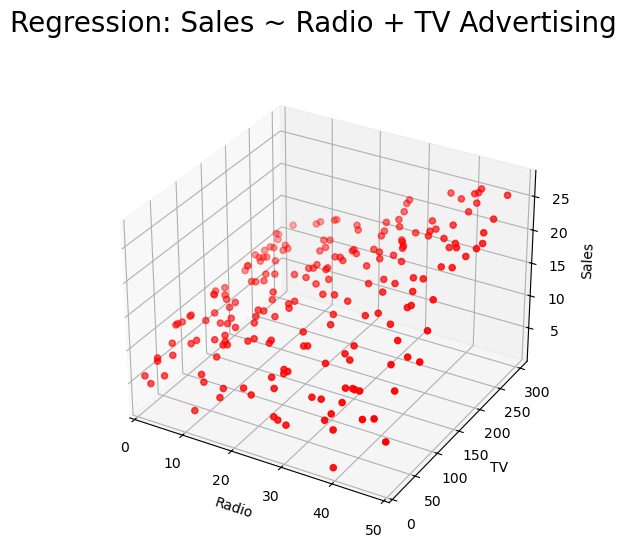

In [50]:
# Create plot
%matplotlib inline
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')
ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

In [52]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(model.intercept_ + B1[i,j]*model.coef_[0][0] + B2[i,j]*model.coef_[0][1])

/var/folders/s5/gcy6hmzn6zgd1mwk8vv9g7gr0000gn/T/ipykernel_69879/2032051152.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] =(model.intercept_ + B1[i,j]*model.coef_[0][0] + B2[i,j]*model.coef_[0][1])


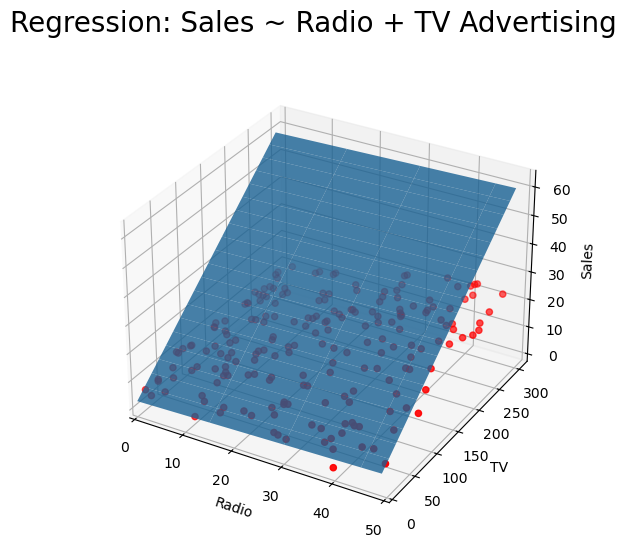

In [54]:
# Create plot
%matplotlib inline
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')
ax.plot_surface(B1, B2, Z, rstride=15, cstride=15, alpha=0.8)

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

In [55]:
mean_squared_error(y_train,y_pred)

2.784569900338091

# Notiamo che è molto più bassa

Osserviamo che utilizzando due predictor abbiamo un errore di predizione molto più basso rispetto all'utilizzo di un predictor. 

# Proviamo con tre predictor

In [56]:
x_train = advertising[['TV','Radio','Newspaper']].values

In [57]:
x_train

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

Proviamo a plottare i grafici nella stessa figure

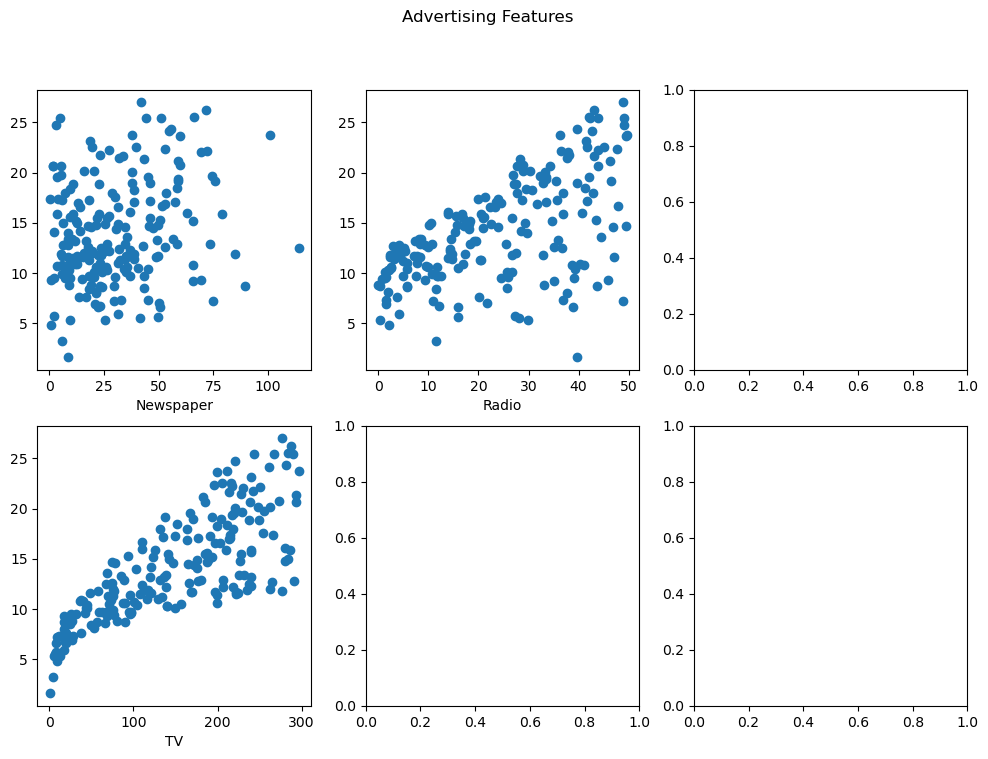

In [58]:
# Crea la figura e i sei assi
%matplotlib inline
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

# Plotta i tre grafici
axs[0].scatter(advertising['Newspaper'].values, advertising['Sales'].values)

axs[1].scatter(advertising['Radio'].values, advertising['Sales'].values)

axs[3].scatter(advertising['TV'].values, advertising['Sales'].values)

# Aggiunge etichette agli assi e alla figura
fig.suptitle('Advertising Features')
axs[0].set_xlabel('Newspaper')
axs[1].set_xlabel('Radio')
axs[3].set_xlabel('TV')

# Mostra la figura
plt.show()

In [59]:
# facciamo il training anche senza inserire la colonna degli 1 
# (con LinearRegression funziona lo stesso)

model.fit(x_train, y_train)
print('Coefficienti:', model.coef_, 'Intercetta:', model.intercept_)
y_pred = model.predict(x_train)
mean_squared_error(y_train, y_pred)

Coefficienti: [[ 0.04576465  0.18853002 -0.00103749]] Intercetta: [2.93888937]


2.784126314510936

Questa volta con tre predictor abbiamo ottenuto solo un piccolo miglioramento

Come facciamo a capire quanti predictor utilizzare?

# ESERCIZIO
Analizzare il dataset Boston Housing cercando di capire quali possono essere i principali fattori che determinanto il prezzo medio delle case 


Il **Boston Housing Dataset** contiene 14 colonne di dati su 506 case nella zona di Boston. Di seguito una breve descrizione di ogni colonna:

- CRIM: This column represents the per capita crime rate by town.

- ZN: This column represents the proportion of residential land zoned for lots larger than 25,000 square feet.

- INDUS: This column represents the proportion of non-retail business acres per town.

- CHAS: This column represents whether the house is located near the Charles River or not. This is a binary variable with a value of 1 indicating the house is located near the river and 0 indicating it is not.

- NOX: This column represents the nitric oxide concentration (parts per 10 million) in the air.

- RM: This column represents the average number of rooms per dwelling.

- AGE: This column represents the proportion of owner-occupied units built prior to 1940.

- DIS: This column represents the weighted distances to five Boston employment centers.

- RAD: This column represents the index of accessibility to radial highways.

- TAX: This column represents the full-value property tax rate per $10,000.

- PTRATIO: This column represents the pupil-teacher ratio by town.

- B: This column represents the proportion of Black residents by town.

- LSTAT: This column represents the percentage of lower status of the population.

- MEDV: This column represents the median value of owner-occupied homes in $1000s.

Queste colonne possono essere utilizzate come variabili indipendenti in un modello di regressione lineare per prevedere il valore medio delle abitazioni (variabile dipendente) in base alle caratteristiche delle case e della zona in cui si trovano.






In [62]:

# Specifichiamo i nomi delle colonne
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
             'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Importiamo il dataset usando read_csv()
boston = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                   header=None, delimiter=r"\s+", names=col_names)

# Visualizziamo le prime righe del dataset
print(boston.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [63]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [64]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Per selezionare le features più significative potete usare la funzione corr che genera la matrice di correlazione tra le variabili. La correlazione è un'operatore statistico che fornisce un'indicazione di un legame lineare tra due variabili statistiche. La correlazione varia tra -1 e 1. Più è vicino a 1 o -1, più è significativo il legame lineare 

In [65]:
corr_matrix = boston.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


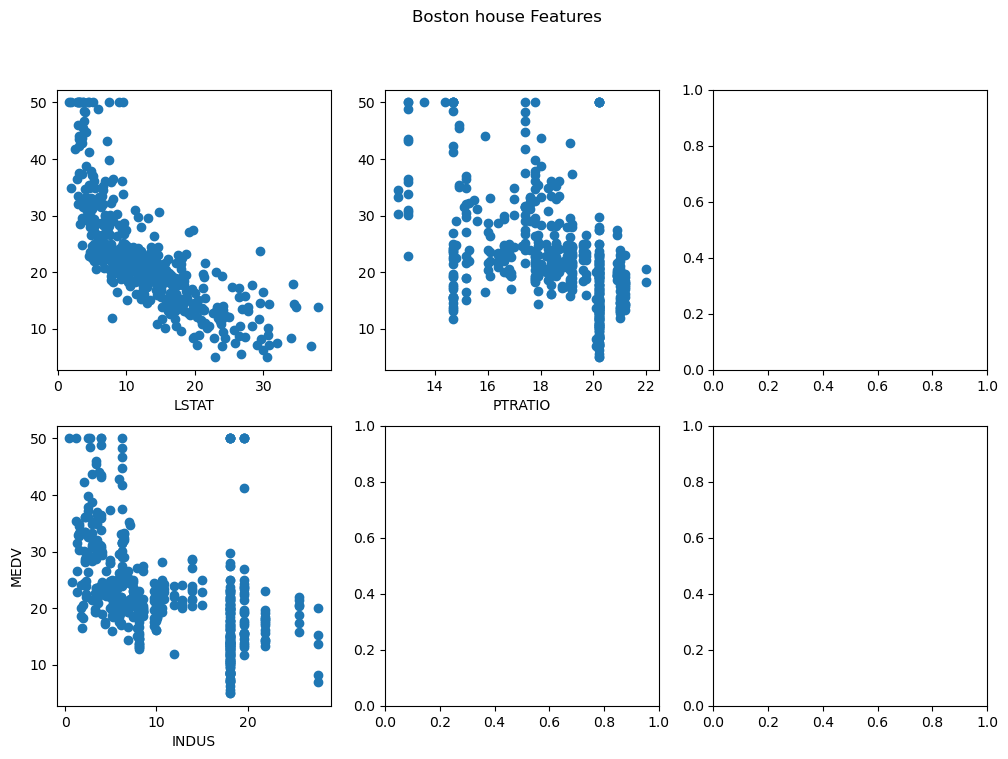

In [66]:
# Crea la figura e i sei assi
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

# Plotta i tre grafici
axs[0].scatter(boston['LSTAT'].values, boston['MEDV'].values)

axs[1].scatter(boston['PTRATIO'].values, boston['MEDV'].values)

axs[3].scatter(boston['INDUS'].values, boston['MEDV'].values)

# Aggiunge etichette agli assi e alla figura
fig.suptitle('Boston house Features')
axs[0].set_xlabel('LSTAT')
axs[1].set_xlabel('PTRATIO')
axs[3].set_xlabel('INDUS')
axs[3].set_ylabel('MEDV')


# Mostra la figura
plt.show()

Proviamo ad utilizzare la libreria Seaborn

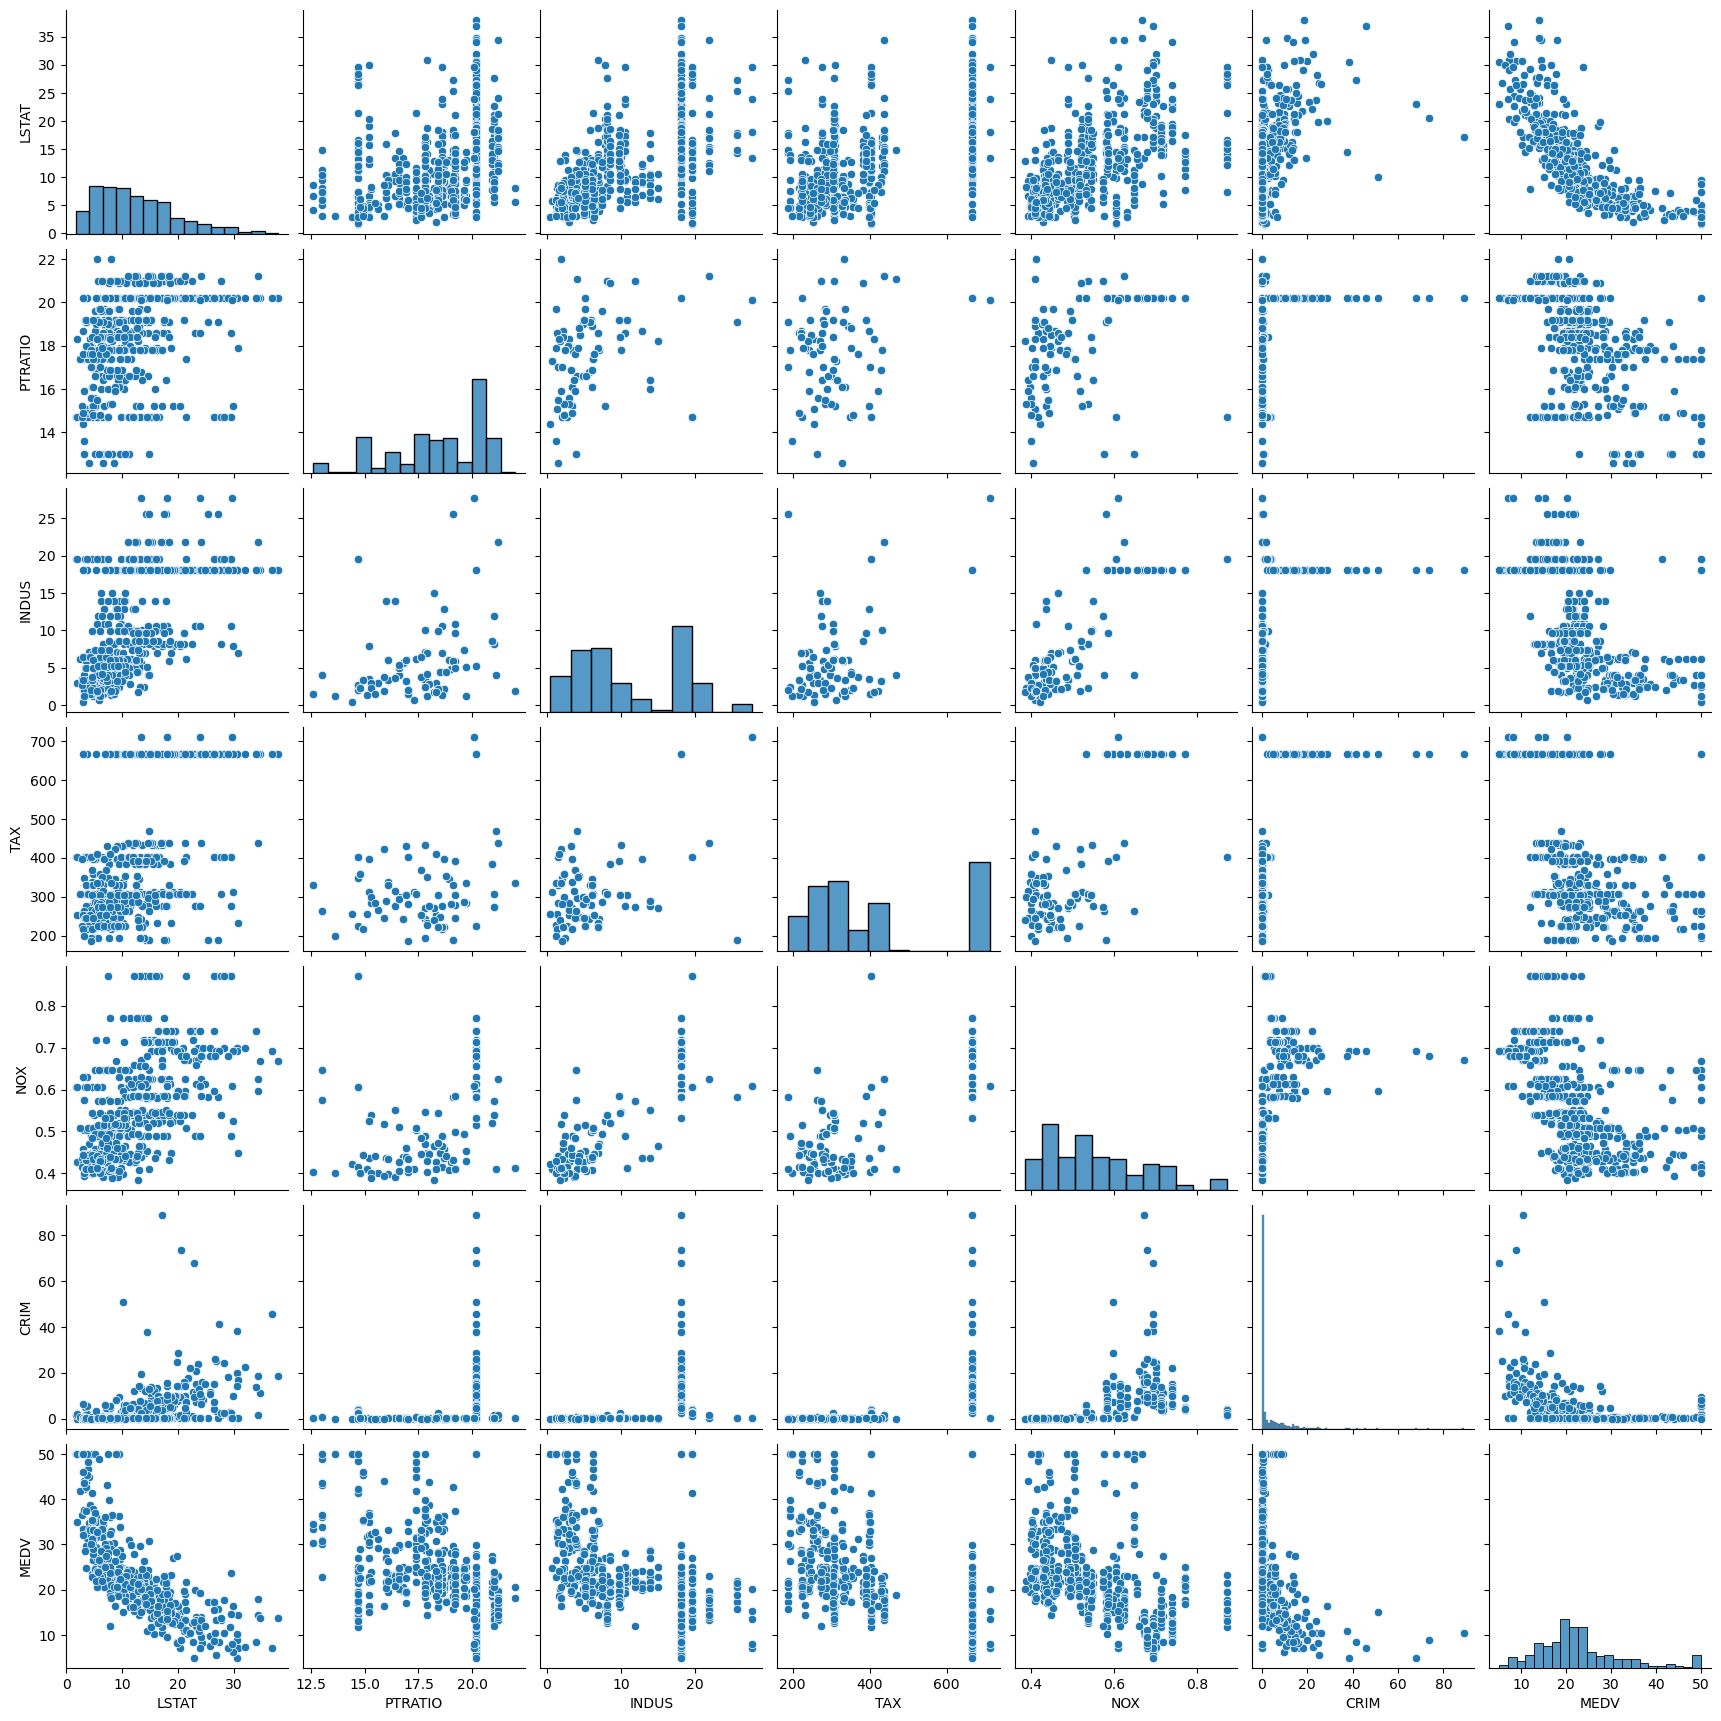

In [67]:
import seaborn as sns
sns.pairplot(boston[['LSTAT','PTRATIO', 'INDUS', 'TAX','NOX','CRIM','MEDV']]);

In [68]:
x_train1 = boston[['LSTAT','PTRATIO','RM','ZN']].values
y_train1 = boston['MEDV'].values.reshape(-1,1)

In [69]:
x_train1.shape

(506, 4)

In [70]:
y_train1.shape

(506, 1)

In [71]:
y_train1

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [75]:

model1 = LinearRegression()
model1.fit(x_train1,y_train1)
y_pred1 = model1.predict(x_train1)
mean_squared_error(y_pred1,y_train1)

27.100832949886456

In [81]:
mse = []
for i in range(0,12):
    x_train2=boston.iloc[:,i].values.reshape(-1,1)
    model1 = LinearRegression()
    model1.fit(x_train2,y_train1)
    y_pred1 = model1.predict(x_train2)
    mse.append(mean_squared_error(y_pred1,y_train1))

    

Text(0.5, 0, 'N. Features')

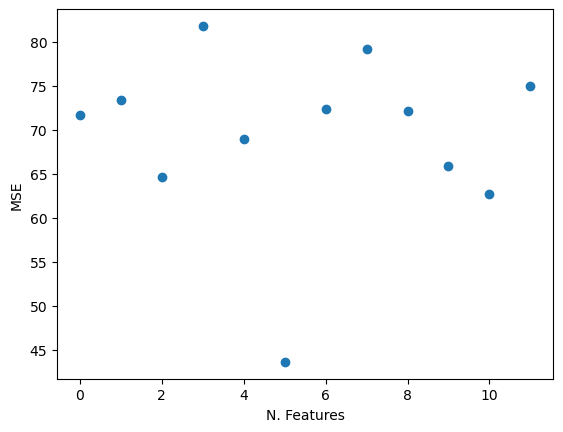

In [82]:
plt.plot(mse,'o')
plt.ylabel("MSE")
plt.xlabel("N. Features")

## Osserviamo che utilizzando una h di tipo lineare ipotizziamo che l'andamento reale dei dati sia lineare

Proviamo a simulare un modello reale che ha un andamento non lineare


Text(0.5, 1.0, 'Modello simulato con andamento sinusoidale')

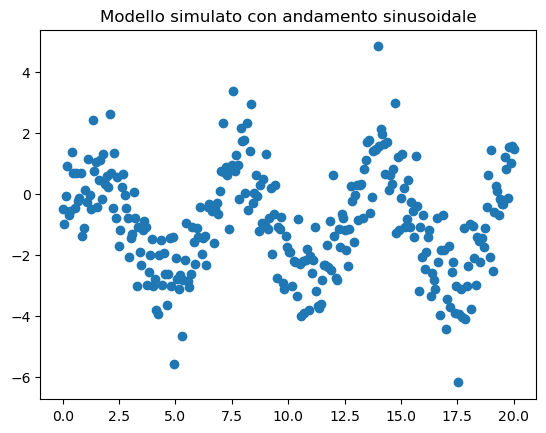

In [83]:
# try to generate a non linear model 
rng = np.random.RandomState(42)  
x = np.linspace(0,20,300)
y = -1 + 2 * np.sin(x) + rng.randn(300)  # introduco del rumore
plt.scatter(x,y)
plt.title('Modello simulato con andamento sinusoidale')

Proviamo a fare una Linear Regression

In [84]:
x_train = x.reshape(-1,1)
y_train = y.reshape(-1,1)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [85]:
print(model.coef_, model.intercept_)

[[-0.0279429]] [-0.66410391]


In [86]:
# make the prediction
y_pred = model.predict(x_train)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

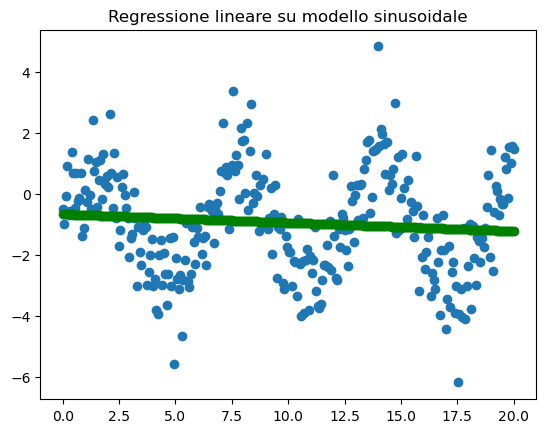

In [87]:
plt.scatter(x,y)
plt.title('Regressione lineare su modello sinusoidale')
plt.plot(x_train, y_pred, 'go');

Osserviamo che abbiamo moltissima dispersione.

Proviamo a calcolare MSE

In [88]:
mean_squared_error(y_train,y_pred)

2.839161244157954

# Proviamo ora con un modello polinomiale
Il nostro modello sarà 

$h(x) = w_0 + w_1 x^1 + w_1 x^2 + ...+w_nx^n$

Osserviamo che il modello è polinomiale nelle $x^{(i)}$ mentre rimane LINEARE nei parametri $w_i$

In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) # modello polinomiale

x_poly = poly.fit_transform(x_train)   # facciamo una trasformazione delle features

# Creiamo un oggetto LinearRegression e addestriamo il modello
model = LinearRegression().fit(x_poly, y_train)

# Prevediamo i valori di y per i dati di input x
y_pred = model.predict(x_poly)

# Stampiamo i coefficienti del modello (intercetta e coefficienti polinomiali)
print('Intercetta:',model.intercept_, 'Coefficienti:',model.coef_)
print('MSE=',mean_squared_error(y_pred,y_train))

Intercetta: [0.12074879] Coefficienti: [[ 0.         -0.40424658  0.03977695 -0.00116325]]
MSE= 2.7861639118370585


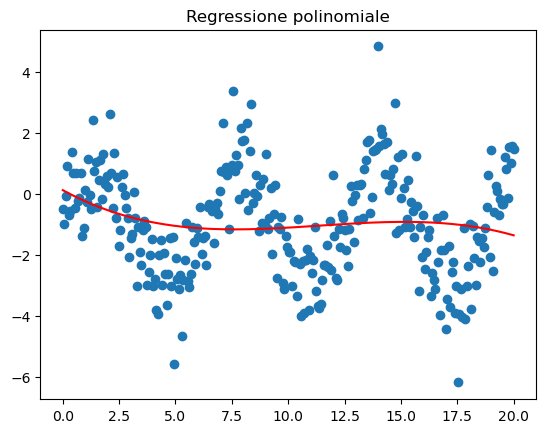

In [90]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.title('Regressione polinomiale')
plt.show()

Proviamo a calcolare MSE

In [91]:
mean_squared_error(y_pred,y_train)

2.7861639118370585

Abbiamo un piccolo miglioramento rispetto alla regressione lineare.

Come si comporta MSE se aumentiamo i parametri?

In [92]:
poly = PolynomialFeatures(degree=7) # modello polinomiale
x_poly = poly.fit_transform(x_train)   # facciamo una trasformazione delle features
# Creiamo un oggetto LinearRegression e addestriamo il modello
model = LinearRegression().fit(x_poly, y_train)
# Prevediamo i valori di y per i dati di input x
y_pred = model.predict(x_poly)
# Stampiamo i coefficienti del modello (intercetta e coefficienti polinomiali)
print('Intercetta:',model.intercept_, 'Coefficienti:',model.coef_)
print('MSE=',mean_squared_error(y_pred,y_train))

Intercetta: [-1.13453709] Coefficienti: [[ 0.00000000e+00  4.83897659e+00 -3.93899324e+00  1.16386419e+00
  -1.65879762e-01  1.23137013e-02 -4.58199656e-04  6.74601637e-06]]
MSE= 1.9847328073398005


Osserviamo che MSE è ulteriormente migliorato.

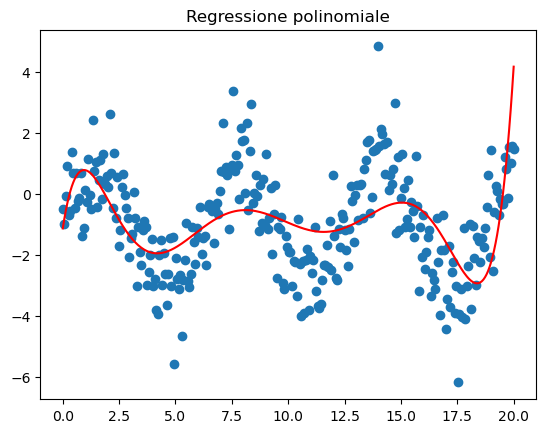

In [93]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.title('Regressione polinomiale')
plt.show()

Vediamo cosa succede se incrementiamo il grado del polinomio progressivamente

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


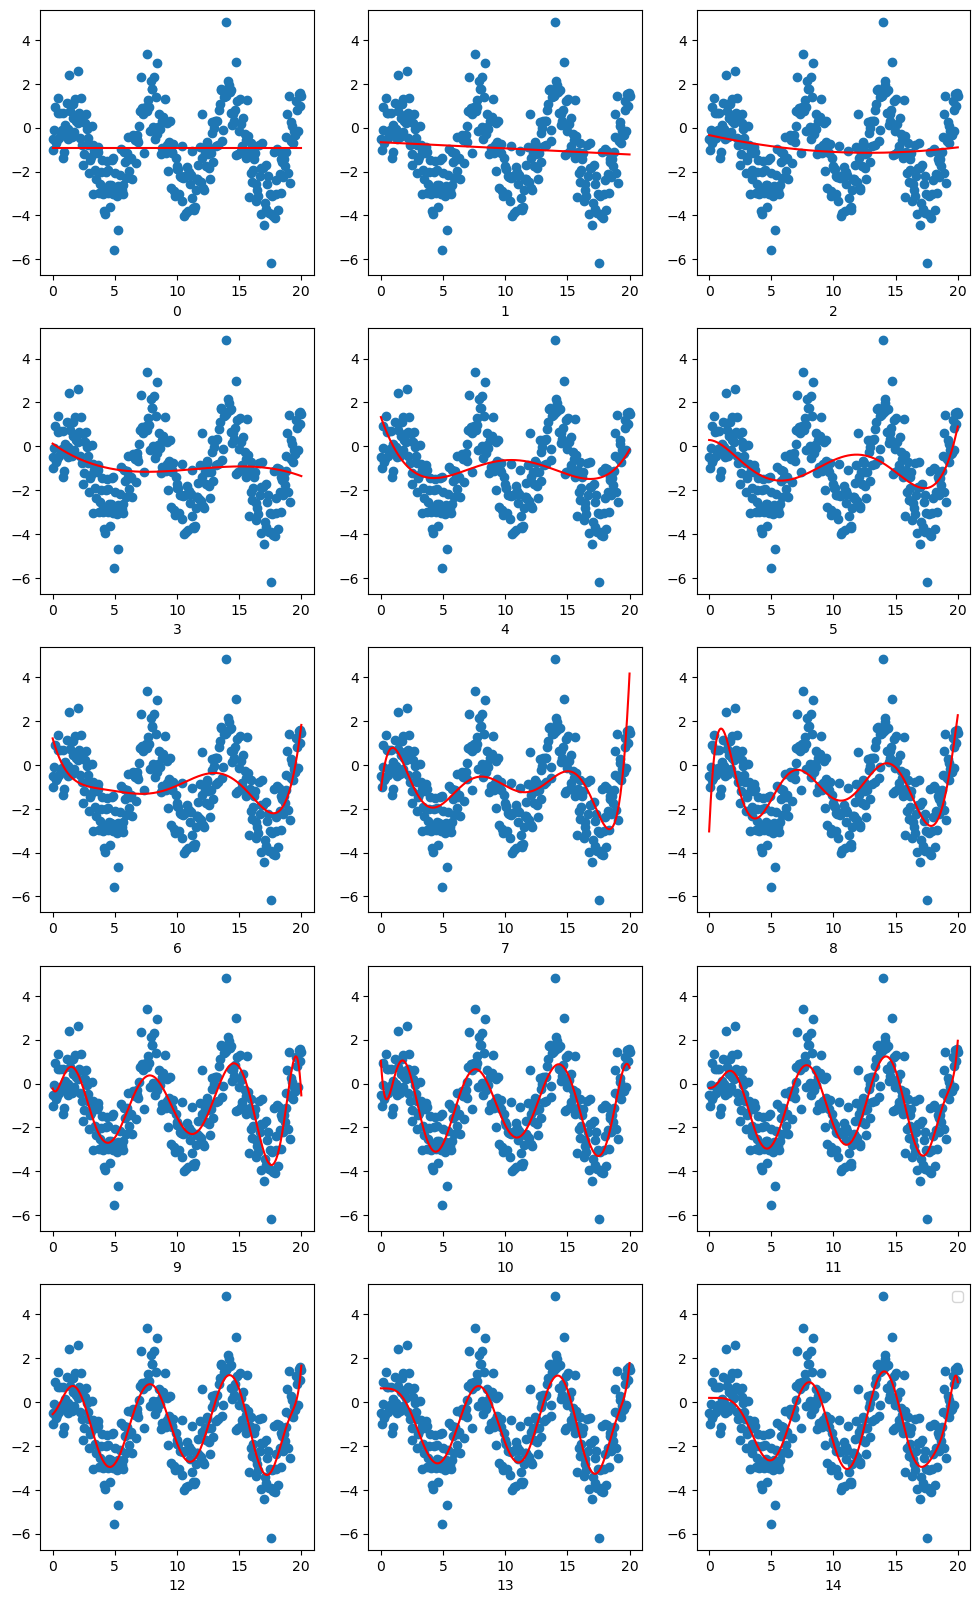

In [94]:
gradopol = 15
mse=[]
fig, axs = plt.subplots(5, 3, figsize=(12, 20))
axs = axs.flatten()
plt.legend()
for i in range(0,gradopol):
    poly = PolynomialFeatures(degree=i) # modello polinomiale
    x_poly = poly.fit_transform(x_train)   # facciamo una trasformazione delle features
    model = LinearRegression().fit(x_poly, y_train)
    y_pred = model.predict(x_poly)
    mse.append(mean_squared_error(y_pred,y_train))
    axs[i].scatter(x_train,y_train)
    axs[i].plot(x_train, y_pred, color='red')
    axs[i].set_xlabel(str(i))

Proviamo a vedere l'andamento del MSE

Text(0, 0.5, 'MSE')

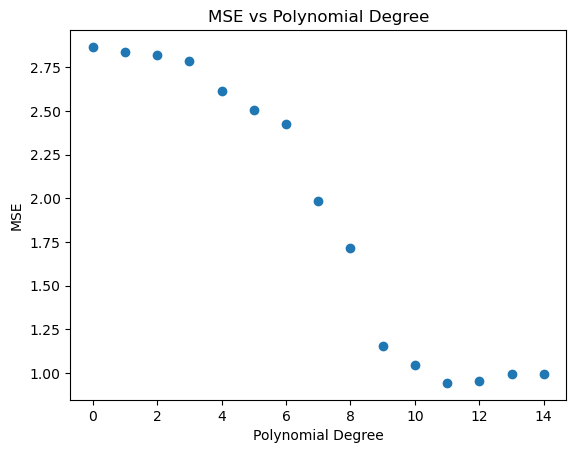

In [95]:
plt.plot(mse, 'o')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')

All'aumentare del grado del polinomio l'MSE sembra scendere progressivamente...quindi all'APPARENZA basterebbe questo per avere un miglior predictor....MA LA REALTA' E' BEN DIVERSA

# ESERCIZIO
Utilizza il modello polinomiale con il dataset Advertising, per la sola feature TV investment. Fai uno scatterplot dei dati mettendo in evidenza la regression line, sia per il modello lineare che per quello polinomiale. Poi calcola i rispettivi MSE e valuta quale modello è più performante.
